In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=777)
#Fake some data for exhibition purpose
X = np.random.uniform(0,1,500)
X = X.reshape(-1,10)
X = X/X.sum(axis=0, keepdims=True)
print(X)
#This is a 50 by 10 dataset

import pandas as pd

[[0.00700959 0.01248929 0.00273213 0.0199935  0.03486264 0.03703426
  0.02797548 0.03412248 0.01209822 0.02562886]
 [0.00428726 0.00329155 0.02596702 0.01492753 0.0412747  0.0250281
  0.02623575 0.0245211  0.01208272 0.01485369]
 [0.0102358  0.00770129 0.01720442 0.00839819 0.02549881 0.03526889
  0.0239484  0.01123889 0.00808617 0.03248846]
 [0.01034799 0.02134956 0.02283493 0.0261027  0.02223105 0.00053175
  0.02016794 0.03977874 0.03459978 0.00488883]
 [0.01358507 0.02528055 0.03197965 0.02015164 0.0321019  0.00765581
  0.02146743 0.02445544 0.02122207 0.03151271]
 [0.00529172 0.02814228 0.01595743 0.01496529 0.01876246 0.00107636
  0.01597927 0.04094858 0.00409883 0.01254013]
 [0.02424427 0.01355109 0.01977057 0.00071018 0.00404981 0.02766946
  0.03216818 0.01884059 0.03814438 0.02175932]
 [0.01625875 0.03004014 0.0041333  0.03881912 0.01403509 0.03562941
  0.01142313 0.01339367 0.03623289 0.03333232]
 [0.02912318 0.01285984 0.00129694 0.01738125 0.02162804 0.00029517
  0.02982099 

In [2]:
m = np.shape(X)[0]
p = np.shape(X)[1]
mm = int(m*(m-1)/2)
maxCorrelation = 0.95
maxCols = p
maxIteration = p+1
print(m,p,maxCorrelation,maxIteration)

50 10 0.95 11


In [3]:
def matProd(mat1,mat2):
    #print(np.shape(mat1),np.shape(mat2))
    d = np.matmul(mat1.T,mat2)
    d1 = np.trace(d)
    return (d1)
matProd(X,X)

0.27166109808710576

In [4]:
#Col algorithm
from scipy.spatial import distance_matrix
#print(previousColDist)
#print(allColDist)

def myRange(start,stop,step):
    if start == stop: 
        return ([stop])
    else:
        return (np.arange(start,stop,step))

def dist(matrix):
    d = distance_matrix(matrix,matrix)
    return (d**2)

correlation = 0.0
selectedCols = []
mm = int( m*(m-1)/2 - 1 )
previousColDist = np.zeros((m,m))
previousColDist = np.asarray(previousColDist)
allColDist = dist(X) #m*(m-1)/2

#VERBOSE = True for debugging
VERBOSE = False

iterations = 0
bestColumn = 0 
bestCorrelation = 0.0

print('Maximal select-able number of dimensions',maxCols)
while (correlation<maxCorrelation and len(selectedCols)<maxCols) and iterations<50:
    print('Selected columns: ',selectedCols)
    print('Cumulative correlation =',bestCorrelation)
    print('Iteration :',iterations)
    print('Coefficient threshold =',maxCorrelation)
    #print('previousColDist',previousColDist)
    bestColumn = 0 
    bestCorrelation = 0.0
    previousBestCorrelation = 0.0
    iterations = iterations + 1

    for j in myRange(1,p,1):
        #print(j)
        if j not in selectedCols:
            X_j = X[:,j-1].reshape(-1,1)
            jColDist = dist(X_j)
            cumColDist = np.add(jColDist,previousColDist)
            #print(np.shape(jColDist))
            #Frobenius matrix coefficient 
            #corr(A,B) = trace(A^{T}B)/sqrt(trace(A^{T}A)*trace(B^{T}B))
            correlation = matProd(cumColDist,allColDist)/np.sqrt( (matProd(cumColDist,cumColDist)*matProd(allColDist,allColDist) ) )
            if VERBOSE:print('Correlation =',correlation,' if we include column',j,'(represented as ',j-1,'in numpy array)')
            if correlation > bestCorrelation:
                bestColumn = j
                bestCorrelation = np.copy(correlation)
    if VERBOSE:print('***Best column to include is the column',bestColumn,' with correlation', bestCorrelation)
    if previousBestCorrelation > bestCorrelation or bestCorrelation > 1:
        bestCorrelation = np.copy(previousBestCorrelation)
        break
    X_bestColumn = X[:,bestColumn-1]
    X_bestColumn = X_bestColumn.reshape(-1,1)
    bestColDist = dist(X_bestColumn)
    #print('bestColDist',bestColDist)
    previousColDist = np.add(bestColDist,previousColDist)
    if bestColumn not in selectedCols and bestColumn != 0:
        selectedCols.append(bestColumn)
    previousBestCorrelation = np.copy(bestCorrelation)

print('Output selected columns: ',selectedCols)
print('Final cumulative coefficient (coefficient between full distance matrix and selected column distance matrix): ',bestCorrelation)
            

Maximal select-able number of dimensions 10
Selected columns:  []
Cumulative correlation = 0.0
Iteration : 0
Coefficient threshold = 0.95
Selected columns:  [4]
Cumulative correlation = 0.7282104248161482
Iteration : 1
Coefficient threshold = 0.95
Selected columns:  [4, 1]
Cumulative correlation = 0.8530515430947774
Iteration : 2
Coefficient threshold = 0.95
Selected columns:  [4, 1, 3]
Cumulative correlation = 0.9131986763708445
Iteration : 3
Coefficient threshold = 0.95
Selected columns:  [4, 1, 3, 8]
Cumulative correlation = 0.942143666893317
Iteration : 4
Coefficient threshold = 0.95
Output selected columns:  [4, 1, 3, 8, 9]
Final cumulative coefficient (coefficient between full distance matrix and selected column distance matrix):  0.9607476464190657


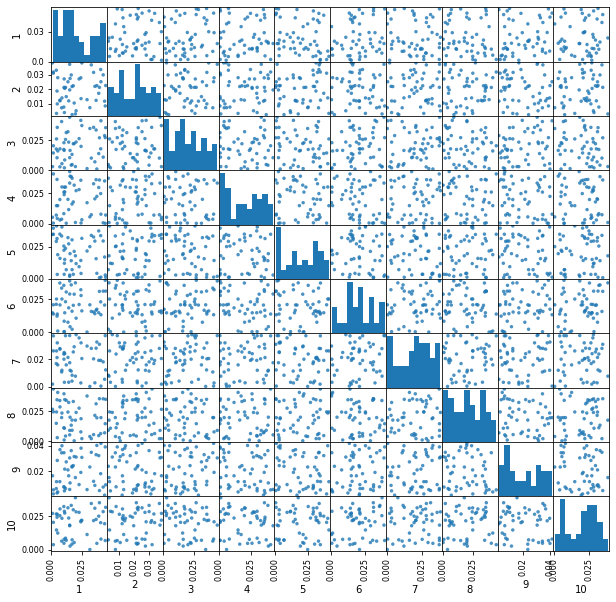

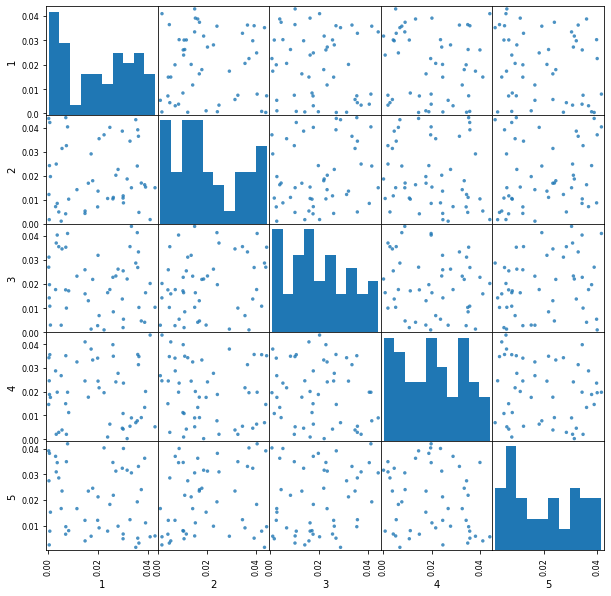

In [5]:
members_index = [x - 1 for x in selectedCols]
X_df = pd.DataFrame(data=X[0:,0:],index=X[0:,0],columns=myRange(1,(np.shape(X)[1]+1),1))
X_reduced = X[:,members_index]
X_reduced_df = pd.DataFrame(data=X_reduced[0:,0:],index=X_reduced[0:,0],columns=myRange(1,(np.shape(X_reduced)[1]+1),1))

g1 = pd.plotting.scatter_matrix(X_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 12, alpha = 0.8)
new_labels = [round(float(i.get_text()), 2) for i in g1[0,0].get_yticklabels()]
g1[0,0].set_yticklabels(new_labels)
plt.show()

g2 = pd.plotting.scatter_matrix(X_reduced_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 12, alpha = 0.8)
new_labels = [round(float(i.get_text()), 2) for i in g2[0,0].get_yticklabels()]
g2[0,0].set_yticklabels(new_labels)
plt.show()